In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import numpy as np
import scipy.stats as stats

In [301]:
df=pd.read_csv('C:\\Users\\alokd\\Downloads\\Crab Molt Data.csv')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Post-molt  472 non-null    float64
 1   Pre-molt   472 non-null    float64
 2   Location   472 non-null    object 
dtypes: float64(2), object(1)
memory usage: 11.2+ KB
None


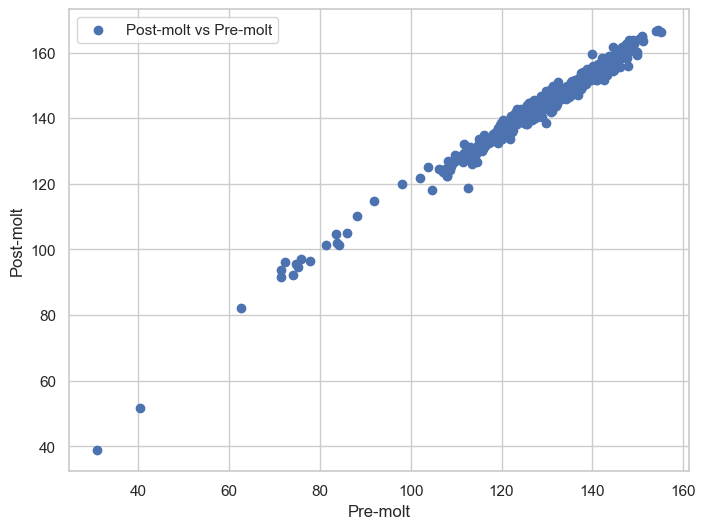

In [303]:
x=df['Pre-molt']
y=df['Post-molt']

plt.figure(figsize=(8,6))
plt.scatter(x,y, color='b', label= 'Post-molt vs Pre-molt')
plt.xlabel('Pre-molt')
plt.ylabel('Post-molt')
plt.grid('true')
plt.legend()


In [305]:
# Columns to analyze
columns_to_analyze = ['Pre-molt', 'Post-molt']

# Calculate descriptive statistics
desc_stats = df[columns_to_analyze].describe()

# Calculate maximum and minimum for 'Pre-molt' and 'Post-molt' columns
max_values = df[['Pre-molt', 'Post-molt']].max()
min_values = df[['Pre-molt', 'Post-molt']].min()

# Add maximum and minimum values to the descriptive statistics DataFrame
desc_stats.loc['max_calculated'] = max_values
desc_stats.loc['min_calculated'] = min_values

# Calculate and add the median
median_values = df[columns_to_analyze].median()
desc_stats.loc['median'] = median_values

# Calculate and add the mode (handling multiple modes by taking the first mode)
def get_first_mode(series):
    mode = series.mode()
    return mode.iloc[0] if not mode.empty else None  # Handle case when there's no mode

def Kurtosis(data):
    X=data
    for i in X:
        print(i)
mode_values = df[columns_to_analyze].apply(get_first_mode)
desc_stats.loc['mode'] = mode_values

# Display the updated descriptive statistics 
print(desc_stats)


                  Pre-molt   Post-molt
count           472.000000  472.000000
mean            129.211864  143.897669
std              15.864520   14.640602
min              31.100000   38.800000
25%             121.675000  137.975000
50%             132.800000  147.400000
75%             140.000000  153.425000
max             155.100000  166.800000
max_calculated  155.100000  166.800000
min_calculated   31.100000   38.800000
median          132.800000  147.400000
mode            138.300000  151.500000


In [307]:

# Calculate skewness for 'Pre-molt' and 'Post-molt' columns
skewness_pre_molt = skew(df['Pre-molt'])
skewness_post_molt = skew(df['Post-molt'])

# Present the results
print(f"Skewness of Pre-molt: {skewness_pre_molt}")
print(f"Skewness of Post-molt: {skewness_post_molt}")


Skewness of Pre-molt: -2.0034871763549766
Skewness of Post-molt: -2.3469021583966594


In [309]:
def calculate_kurtosis(column):
    n = len(column)
    mean = column.mean()
    std_dev = column.std(ddof=0) 

    # Calculate the fourth moment
    fourth_moment = ((column - mean) ** 4).mean()
    
    # Kurtosis calculation
    kurtosis_value = (n * (n + 1) * fourth_moment) / ((n - 1) * (n - 2) * (n - 3) * (std_dev ** 4)) - (3 * (n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurtosis_value

# Calculate kurtosis for 'Pre-molt' and 'Post-molt'
kurtosis_pre_molt = calculate_kurtosis(df['Pre-molt'])
kurtosis_post_molt = calculate_kurtosis(df['Post-molt'])

# Present the results
print(f"Kurtosis of Pre-molt: {kurtosis_pre_molt}")
print(f"Kurtosis of Post-molt: {kurtosis_post_molt}")


Kurtosis of Pre-molt: -2.9982022504508583
Kurtosis of Post-molt: -2.9909991390518114


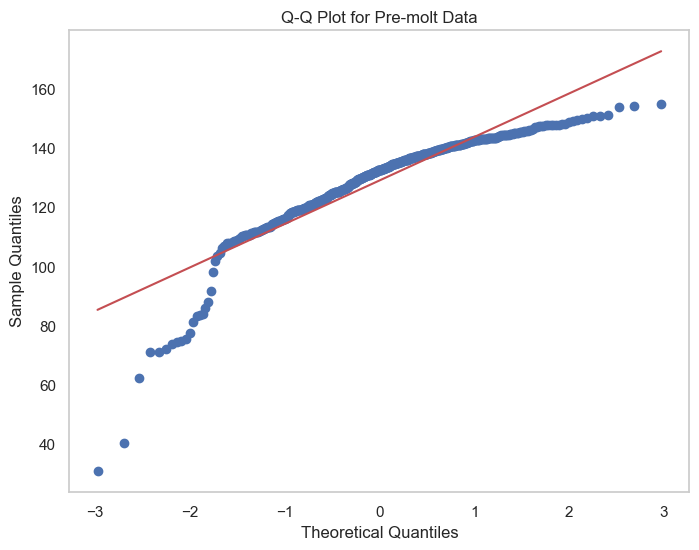

In [311]:
# Create Q-Q plot for 'Pre-molt' data
plt.figure(figsize=(8, 6))
stats.probplot(df['Pre-molt'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Pre-molt Data')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()


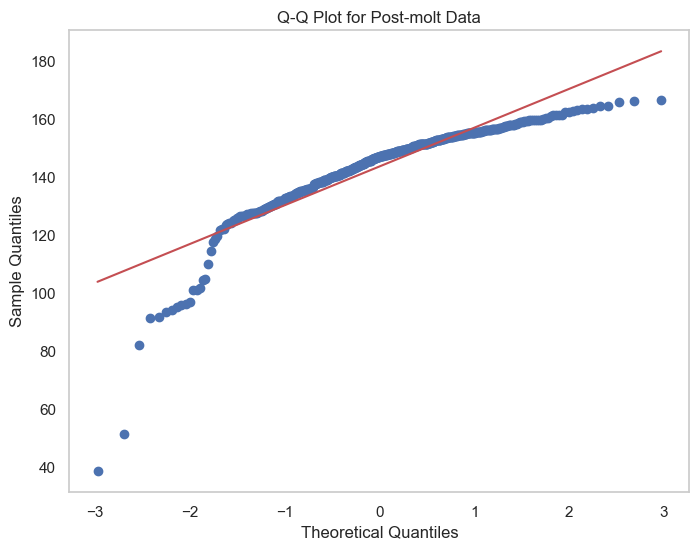

In [312]:
# Create Q-Q plot for 'Post-molt' data
plt.figure(figsize=(8, 6))
stats.probplot(df['Post-molt'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Post-molt Data')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()


In [314]:

# Extract the relevant columns for testing
pre_molt_data = df['Pre-molt'].dropna().values
post_molt_data = df['Post-molt'].dropna().values

def anderson_darling_test(data):
    n = len(data)
   
    # Step 2: Sort the data
    sorted_data = np.sort(data)
   
    # Step 3: Calculate the empirical CDF
    cdf = np.arange(1, n + 1) / n
   
    # Step 4: Calculate the mean and standard deviation of the data
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
   
    # Step 5: Calculate the normal CDF for each sorted data point
    normal_cdf = stats.norm.cdf(sorted_data, loc=mean, scale=std_dev)
   
    # Step 6: Calculate the Anderson-Darling statistic
    A_squared = -n - (1/n) * np.sum((2 * np.arange(1, n + 1) - 1) *
                                      (np.log(normal_cdf) + np.log(1 - np.flip(normal_cdf))))
   
    return A_squared

# Perform the Anderson-Darling test for pre-molt and post-molt data
A_squared_pre = anderson_darling_test(pre_molt_data)
A_squared_post = anderson_darling_test(post_molt_data)

print(f'Anderson-Darling Statistic for Pre-Molt Data: {A_squared_pre}')
print(f'Anderson-Darling Statistic for Post-Molt Data: {A_squared_post}')


# Both of these values are substantially higher than the critical values for common significance levels. Therefore, you would conclude:
# Pre-Molt Data & Post-Molt Data : Reject the null hypothesis; the data does not follow a normal distribution.


Anderson-Darling Statistic for Pre-Molt Data: 12.947777132426495
Anderson-Darling Statistic for Post-Molt Data: 13.970186941171619


In [317]:
from scipy.stats import ks_1samp, ks_2samp, norm

pre_molt_data = np.array(df['Pre-molt'], dtype=float)
post_molt_data = np.array(df['Post-molt'], dtype=float)

# One-sample K-S Test for Pre-molt data against a normal distribution
mean_pre_molt = np.mean(pre_molt_data)
std_pre_molt = np.std(pre_molt_data, ddof=1)

# Perform the K-S test for Pre-molt
D_pre_molt, p_value_pre_molt = ks_1samp(pre_molt_data, cdf=lambda x: norm.cdf(x, loc=mean_pre_molt, scale=std_pre_molt))

print(f"One-sample K-S Test Statistic for Pre-molt: {D_pre_molt}, p-value: {p_value_pre_molt}")

# One-sample K-S Test for Post-molt data against a normal distribution
mean_post_molt = np.mean(post_molt_data)
std_post_molt = np.std(post_molt_data, ddof=1)

# Perform the K-S test for Post-molt
D_post_molt, p_value_post_molt = ks_1samp(post_molt_data, cdf=lambda x: norm.cdf(x, loc=mean_post_molt, scale=std_post_molt))

print(f"One-sample K-S Test Statistic for Post-molt: {D_post_molt}, p-value: {p_value_post_molt}")

# Two-sample K-S Test between Pre-molt and Post-molt data
D_two_sample, p_value_two_sample = ks_2samp(pre_molt_data, post_molt_data)
print(f"Two-sample K-S Test Statistic: {D_two_sample}, p-value: {p_value_two_sample}")


One-sample K-S Test Statistic for Pre-molt: 0.10046563539270326, p-value: 0.0001338059575012799
One-sample K-S Test Statistic for Post-molt: 0.10288092652323239, p-value: 8.386433521526697e-05
Two-sample K-S Test Statistic: 0.4872881355932203, p-value: 3.5409796526731966e-51


In [319]:
from scipy.stats import cramervonmises
cvm_test_pre = cramervonmises(pre_molt_data, 'norm')
print(f"Cramér-von Mises test for Pre-Molt: Statistic = {cvm_test_pre.statistic}, p-value = {cvm_test_pre.pvalue}")
cvm_test_post = cramervonmises(post_molt_data, 'norm')
print(f"Cramér-von Mises test for Post-Molt: Statistic = {cvm_test_post.statistic}, p-value = {cvm_test_post.pvalue}")

Cramér-von Mises test for Pre-Molt: Statistic = 157.33333333333331, p-value = 4.255264751673593e-08
Cramér-von Mises test for Post-Molt: Statistic = 157.33333333333331, p-value = 4.255264751673593e-08


In [321]:
from scipy.stats import shapiro

# Convert data to numpy arrays
pre_molt_data = np.array(df['Pre-molt'], dtype=float)
post_molt_data = np.array(df['Post-molt'], dtype=float)

def perform_shapiro_test(data):
    """
    Perform the Shapiro-Wilk test for a given dataset to check for normality.
    
    Parameters:
    - data: np.ndarray, the data to test
    
    Returns:
    - statistic: float, the test statistic
    - pvalue: float, the p-value of the test
    """
    # Perform the Shapiro-Wilk test
    test_result = shapiro(data)
    
    return test_result.statistic, test_result.pvalue

# Execute the Shapiro-Wilk test for Pre-molt data
sw_stat_pre, sw_pvalue_pre = perform_shapiro_test(pre_molt_data)
print(f"Shapiro-Wilk test for Pre-molt: Statistic = {sw_stat_pre}, p-value = {sw_pvalue_pre}")

# Execute the Shapiro-Wilk test for Post-molt data
sw_stat_post, sw_pvalue_post = perform_shapiro_test(post_molt_data)
print(f"Shapiro-Wilk test for Post-molt: Statistic = {sw_stat_post}, p-value = {sw_pvalue_post}")



Shapiro-Wilk test for Pre-molt: Statistic = 0.8502103867445177, p-value = 9.000187748233194e-21
Shapiro-Wilk test for Post-molt: Statistic = 0.8298033094981744, p-value = 4.861382514717977e-22


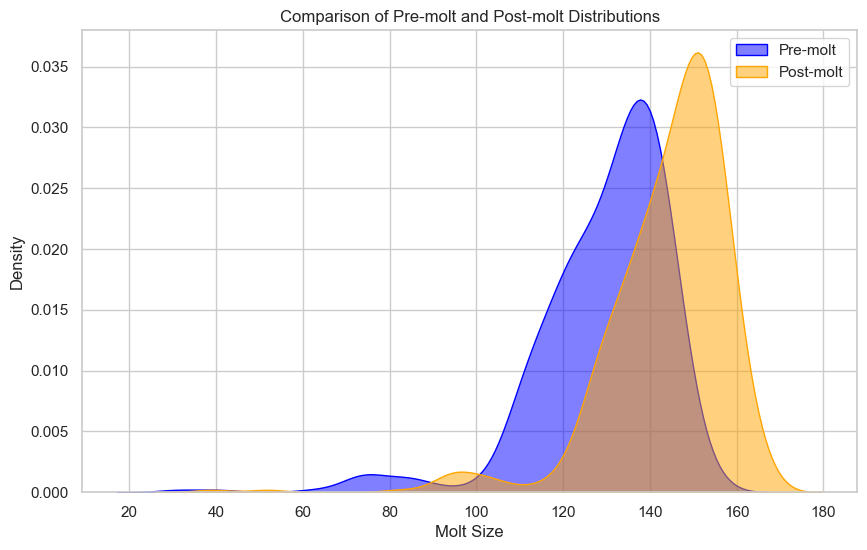

In [323]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a smooth histogram (KDE) plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Pre-molt'], label='Pre-molt', fill=True, color='blue', alpha=0.5)
sns.kdeplot(df['Post-molt'], label='Post-molt', fill=True, color='orange', alpha=0.5)

# Adding labels and title
plt.title('Comparison of Pre-molt and Post-molt Distributions')
plt.xlabel('Molt Size')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


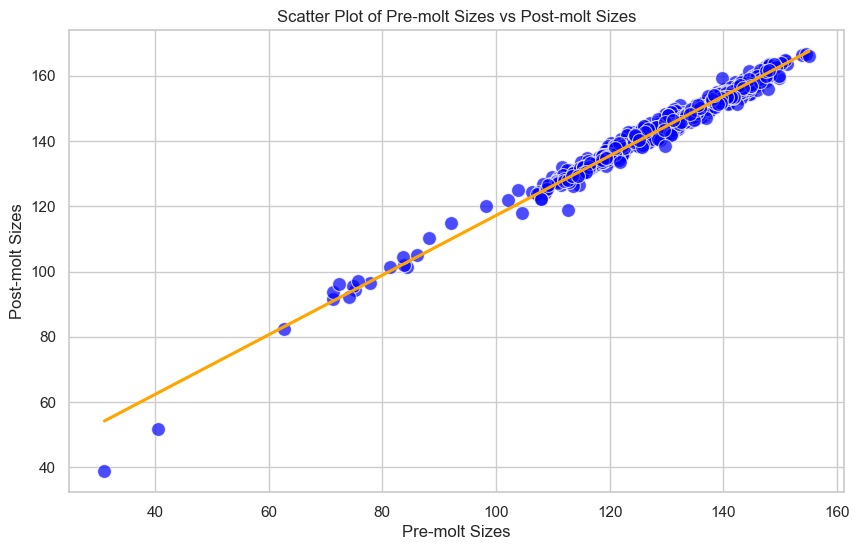

In [324]:

# Set the style for the plot
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Pre-molt', y='Post-molt', color='blue', s=100, alpha=0.7)

# Adding a line of best fit
sns.regplot(data=df, x='Pre-molt', y='Post-molt', scatter=False, color='orange', ci=None)

# Adding labels and title
plt.title('Scatter Plot of Pre-molt Sizes vs Post-molt Sizes')
plt.xlabel('Pre-molt Sizes')
plt.ylabel('Post-molt Sizes')

# Show the plot
plt.show()


Pearson's R-squared value: 0.9808325947886156


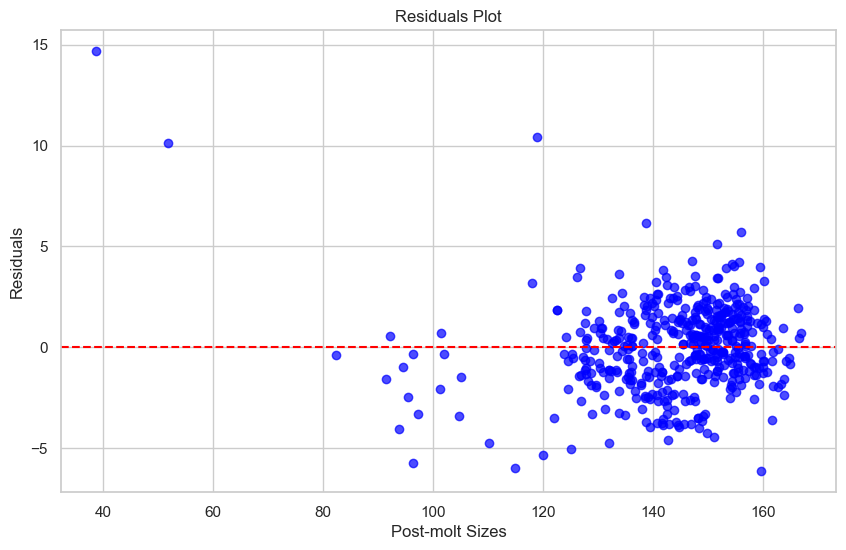

Skewness of residuals: 0.8454524569962826
Kurtosis of residuals: 5.378683748669221


<Figure size 1000x600 with 0 Axes>

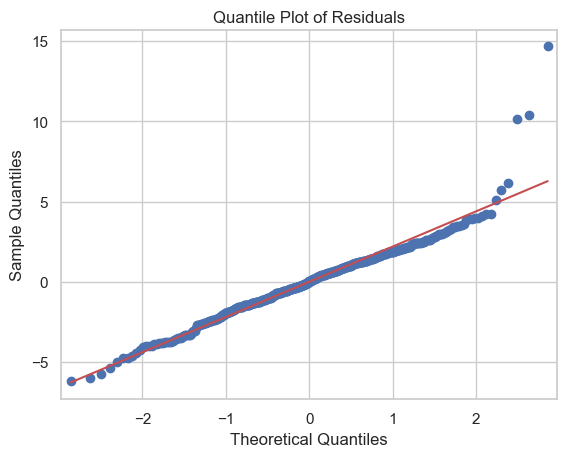

Kolmogorov-Smirnov test: Statistic = 0.1694621431707135, p-value = 2.55544003008949e-12
Anderson-Darling test: Statistic = 1.8232770595980128, Critical Values = [0.571 0.651 0.78  0.91  1.083], Significance Level = [15.  10.   5.   2.5  1. ]
Cramér-von Mises test: Statistic = 6.301651384737001
Shapiro-Wilk test: Statistic = 0.9472371714286946, p-value = 6.356308481532477e-12
Breusch-Pagan test results:
Lagrange multiplier statistic: 89.38639408257414
p-value: 3.2476245276332853e-21
f-value: 109.80164993891152
f p-value: 3.1294545123657303e-23
White test results:
Test statistic: 238.2287680174627
p-value: 1.8590039377746285e-52
f-statistic: 238.97143214041023
f p-value: 2.7676183546101413e-72


In [326]:
import statsmodels.api as sm


# 1. Fit a linear regression model
X = sm.add_constant(df['Post-molt'])  # Add a constant term for the intercept
model = sm.OLS(df['Pre-molt'], X).fit()

# 2. Print the R-squared value
print(f"Pearson's R-squared value: {model.rsquared}")

# 3. Plot of residuals
residuals = model.resid
plt.figure(figsize=(10, 6))
plt.scatter(df['Post-molt'], residuals, color='blue', alpha=0.7)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals Plot')
plt.xlabel('Post-molt Sizes')
plt.ylabel('Residuals')
plt.show()

# 4. Checks for normality of the residuals
# Skewness and Kurtosis
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)

print(f"Skewness of residuals: {skewness}")
print(f"Kurtosis of residuals: {kurtosis}")

# Quantile plot of residuals
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('Quantile Plot of Residuals')
plt.show()

# Normality tests
ks_stat, ks_pvalue = stats.kstest(residuals, 'norm')
ad_stat, ad_critical_values, ad_significance_level = stats.anderson(residuals)
cvm_stat = stats.cramervonmises(residuals, 'norm').statistic
sw_stat, sw_pvalue = stats.shapiro(residuals)

print(f"Kolmogorov-Smirnov test: Statistic = {ks_stat}, p-value = {ks_pvalue}")
print(f"Anderson-Darling test: Statistic = {ad_stat}, Critical Values = {ad_critical_values}, Significance Level = {ad_significance_level}")
print(f"Cramér-von Mises test: Statistic = {cvm_stat}")
print(f"Shapiro-Wilk test: Statistic = {sw_stat}, p-value = {sw_pvalue}")

# 5. Heteroskedasticity Checks
# Visual estimation from the residuals plot is already shown above.

# Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, X)
bp_labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_results = dict(zip(bp_labels, bp_test))
print("Breusch-Pagan test results:")
for label, result in bp_results.items():
    print(f"{label}: {result}")

# White test (this requires the residuals and the independent variables)
from statsmodels.stats.diagnostic import het_white
white_test = het_white(residuals, X)
white_labels = ['Test statistic', 'p-value', 'f-statistic', 'f p-value']
white_results = dict(zip(white_labels, white_test))
print("White test results:")
for label, result in white_results.items():
    print(f"{label}: {result}")


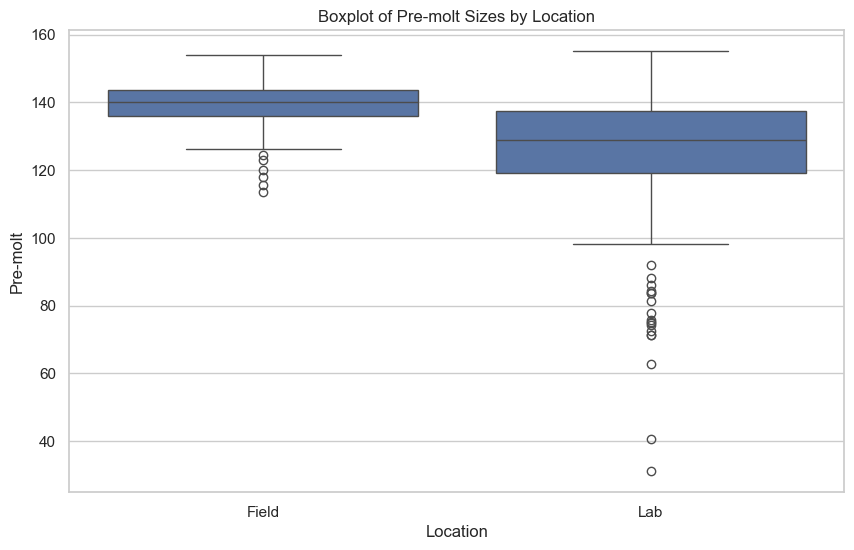

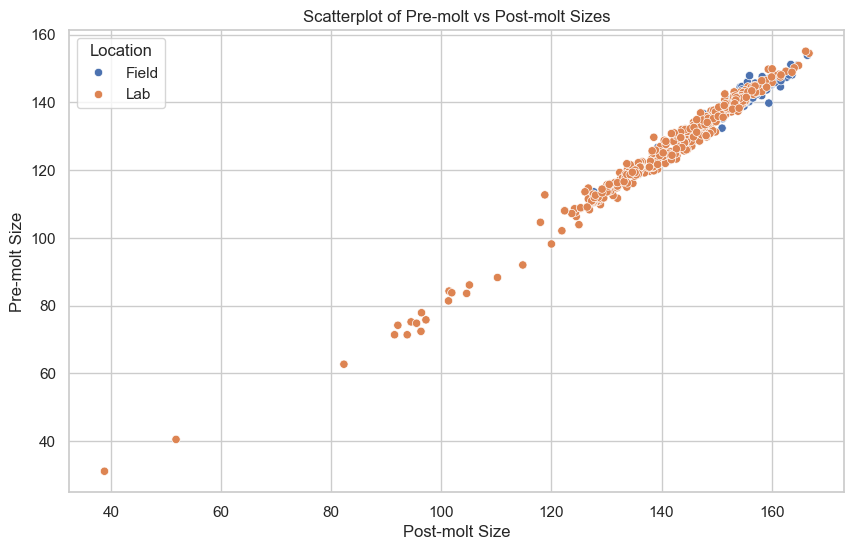

In [328]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of Pre-molt sizes by Environment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Pre-molt', data=df)
plt.title('Boxplot of Pre-molt Sizes by Location')
plt.show()

# Scatterplot of Pre-molt vs Post-molt sizes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Post-molt', y='Pre-molt', hue='Location', data=df)
plt.title('Scatterplot of Pre-molt vs Post-molt Sizes')
plt.xlabel('Post-molt Size')
plt.ylabel('Pre-molt Size')
plt.show()


In [329]:
import statsmodels.api as sm

# Fit linear model for Lab crabs
lab_subset = df[df['Location'] == 'Lab']
X_lab = sm.add_constant(lab_subset['Post-molt'])  # Add constant term for intercept
model_lab = sm.OLS(lab_subset['Pre-molt'], X_lab).fit()

# Fit linear model for Field crabs
field_subset = df[df['Location'] == 'Field']
X_field = sm.add_constant(field_subset['Post-molt'])  # Add constant term for intercept
model_field = sm.OLS(field_subset['Pre-molt'], X_field).fit()

# Print model summaries
print("\nModel Summary for Lab Crabs:\n", model_lab.summary())
print("\nModel Summary for Field Crabs:\n", model_field.summary())



Model Summary for Lab Crabs:
                             OLS Regression Results                            
Dep. Variable:               Pre-molt   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.853e+04
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          4.67e-311
Time:                        17:05:17   Log-Likelihood:                -809.88
No. Observations:                 361   AIC:                             1624.
Df Residuals:                     359   BIC:                             1632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.3439

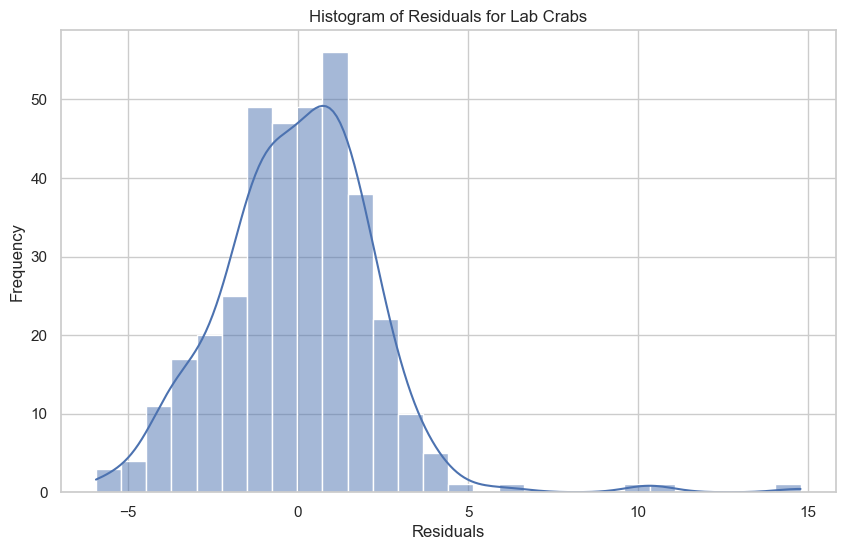

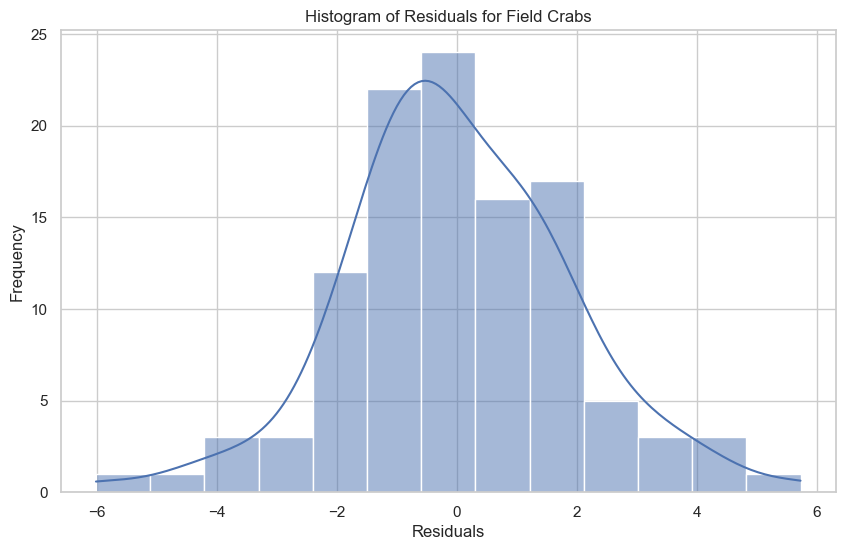

In [331]:
# Residuals for Lab crabs
residuals_lab = model_lab.resid
plt.figure(figsize=(10, 6))
sns.histplot(residuals_lab, kde=True)
plt.title('Histogram of Residuals for Lab Crabs')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Residuals for Field crabs
residuals_field = model_field.resid
plt.figure(figsize=(10, 6))
sns.histplot(residuals_field, kde=True)
plt.title('Histogram of Residuals for Field Crabs')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [332]:

# Separate data for Lab and Field environments
lab_data = df[df['Location'] == 'Lab']
field_data = df[df['Location'] == 'Field']

# Features and target variable
X_lab = lab_data[['Post-molt']]
y_lab = lab_data['Pre-molt']

X_field = field_data[['Post-molt']]
y_field = field_data['Pre-molt']

Mean Absolute Error (MAE): 1.484297166324862
Mean Squared Error (MSE): 4.091479283050525
R² Score: 0.9808713833622429


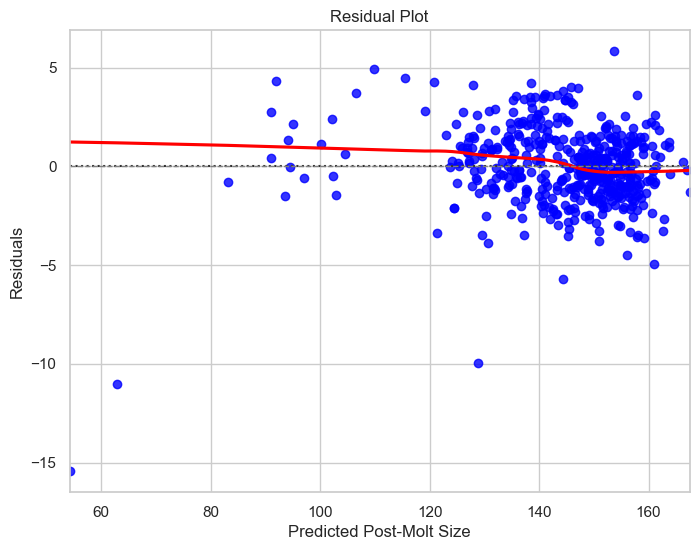

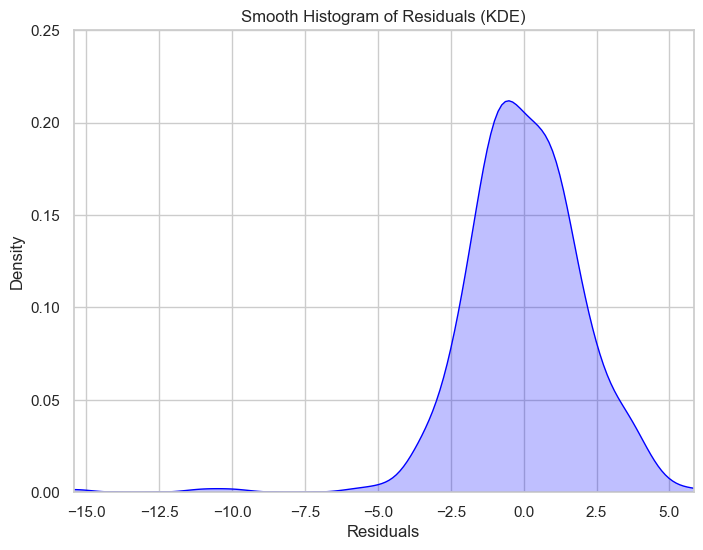

Proportion of residuals within one standard deviation: 0.7415254237288136
Proportion of residuals > mean + 2*std: 0.014830508474576272
Proportion of residuals < mean - 2*std: 0.012711864406779662


In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the DataFrame (assuming 'df' is already defined)
crab_data = df.copy()  # Use a copy to avoid changing the original DataFrame

# Create dummy variables for the Lab location
crab_data['Lab'] = crab_data['Location'].apply(lambda x: 1 if x == 'Lab' else 0)
crab_data['PreMolt_Lab'] = crab_data['Pre-molt'] * crab_data['Lab']

# Define features and target variable
X = crab_data[['Pre-molt', 'Lab', 'PreMolt_Lab']]
y = crab_data['Post-molt']

# Initialize the model
model = LinearRegression()

# Set up k-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation for MAE, MSE, and R²
cross_val_mae = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
cross_val_mse = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
cross_val_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2')

# Fit the model on the entire dataset
model.fit(X, y)
y_pred = model.predict(X)

# Calculate performance metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

# Calculate residuals
residuals = y - y_pred

# Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='blue', line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted Post-Molt Size')
plt.ylabel('Residuals')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.show()

# Smooth Histogram of Residuals (KDE)
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, color='blue', fill=True)
plt.title('Smooth Histogram of Residuals (KDE)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.xlim(min(residuals), max(residuals))
plt.ylim(0, 0.25)
plt.show()

# Analyze residuals
mean_residual = residuals.mean()
std_residual = residuals.std()

# Calculate proportions
prop_within_one_std = ((mean_residual - std_residual < residuals) & (residuals < mean_residual + std_residual)).mean()
prop_greater_than_two_std = (residuals > mean_residual + 2 * std_residual).mean()
prop_less_than_two_std = (residuals < mean_residual - 2 * std_residual).mean()

# Print proportions
print(f'Proportion of residuals within one standard deviation: {prop_within_one_std}')
print(f'Proportion of residuals > mean + 2*std: {prop_greater_than_two_std}')
print(f'Proportion of residuals < mean - 2*std: {prop_less_than_two_std}')


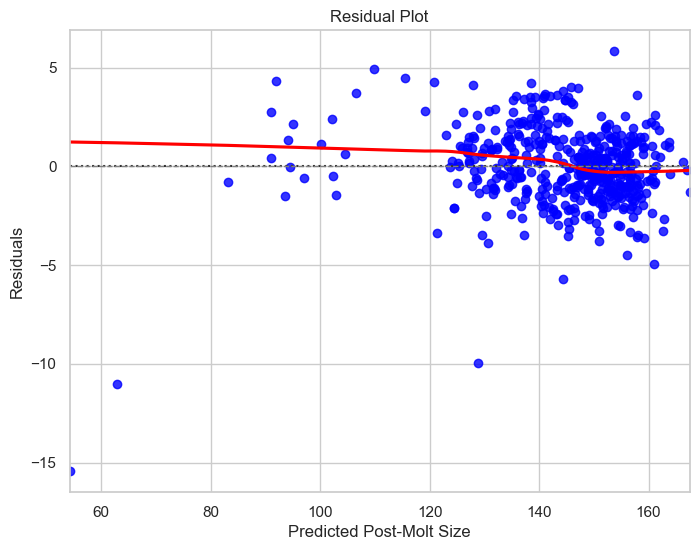

In [336]:
residuals = y - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='blue', line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Predicted Post-Molt Size')
plt.ylabel('Residuals')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.show()